# Operações básicas com imagens
- Agora que já vimos como carregar as imagens em um arquivo `.py`, vamos continuar explorando o opencv usando notebooks pra ficar mais fácil meclar texto e código
    - Para isso vamos plotar os resultados usando matplotlib
    - Todavia, você pode replicar usando `.py` tranquilamente

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Convertendo espaço de cor
- Apesar de que não vamos explorar a fundo outros espaçoes de cor, é interessante saber que a biblioteca oferece centenas de opções

In [3]:
print([x for x in dir(cv2) if x.startswith('COLOR_')])

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_BGGR2BGR', 'COLOR_BAYER_BGGR2BGRA', 'COLOR_BAYER_BGGR2BGR_EA', 'COLOR_BAYER_BGGR2BGR_VNG', 'COLOR_BAYER_BGGR2GRAY', 'COLOR_BAYER_BGGR2RGB', 'COLOR_BAYER_BGGR2RGBA', 'COLOR_BAYER_BGGR2RGB_EA', 'COLOR_BAYER_BGGR2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GBRG2BGR', 'COLOR_BAYER_GBRG2BGRA', 'COLOR_BAYER_GBRG2BGR_EA', 'COLOR_BAYER_GBRG2BGR_VNG', 'COLOR_BAYER_GBRG2GRAY', 'COLOR_BAYER_GBRG2RGB', 'COLOR_BAYER_GBRG2RGBA', 'COLOR_BAYER_GBRG2RGB_EA', 'COLOR_BAYER_GBRG2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_

- Vamos focar no RGB, HSV e GRAY
- Então vamos carregar nossa imagem exemplo e trabalhar nela

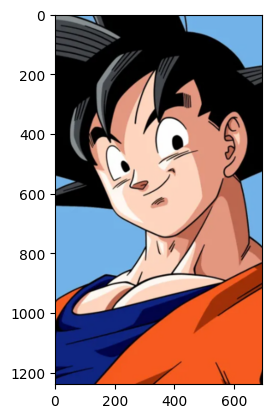

In [4]:
img_goku = cv2.imread("assets/goku.png", cv2.IMREAD_COLOR)
img_goku = cv2.cvtColor(img_goku, cv2.COLOR_BGR2RGB)
plt.imshow(img_goku)

- Vamos converter para níveis de cinza

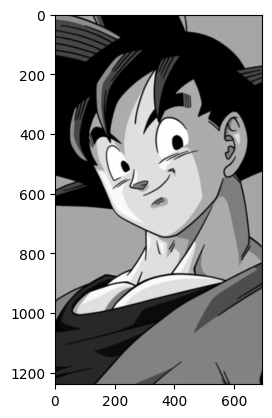

In [5]:
img_goku_gray = cv2.cvtColor(img_goku, cv2.COLOR_RGB2GRAY)
plt.imshow(img_goku_gray, cmap='gray')

- Como seria essa transformação de tons de cinza?
    - É basicamente uma agregação entre os 3 canais de cor
    - Por exemplo, uma média

In [6]:
img_goku[0,0,:]

array([136, 142, 144], dtype=uint8)

In [7]:
img_goku_gray[0,0]

140

- Podemos fazer isso manualmente, modificando o peso de cada cor
- Primeiro, vamos verificar a intensidade de contribuição de cada canal

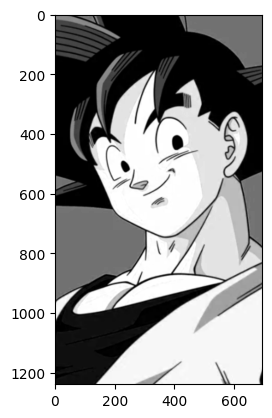

In [11]:
plt.imshow(img_goku[:, :, 0], cmap='gray')

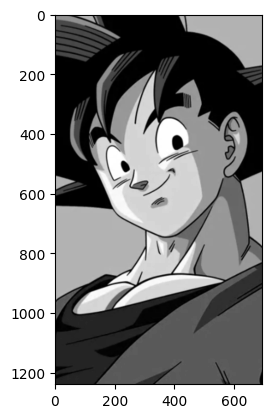

In [13]:
plt.imshow(img_goku[:, :, 1], cmap='gray')

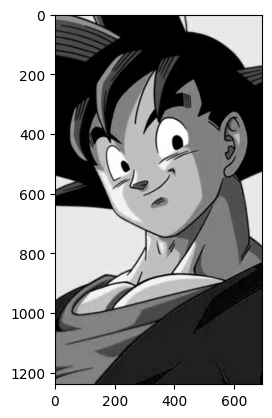

In [14]:
plt.imshow(img_goku[:, :, 2], cmap='gray')

- Alternativamente, poderiamos usar o método `split()`

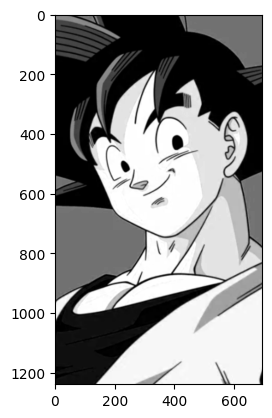

In [15]:
r, g, b = cv2.split(img_goku)
plt.imshow(r, cmap='gray')

- Agora vamos fazer a agregação

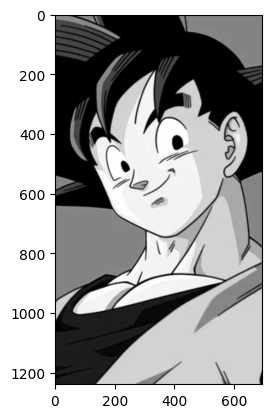

In [17]:
img_goku_gray_2 = 0.8 * img_goku[:, :, 0] + 0.1 * img_goku[:, :, 1] + 0.1 * img_goku[:, :, 2]
plt.imshow(img_goku_gray_2, cmap='gray')

- Podemos fazer a conversão pra outro espaço de cor, no caso HSV (Hue, Saturation, Value)

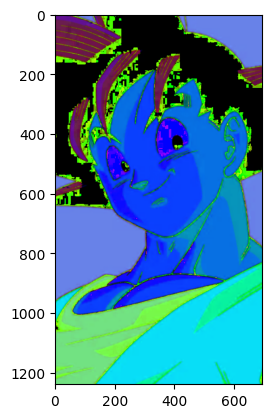

In [18]:
img_goku_hsv = cv2.cvtColor(img_goku, cv2.COLOR_RGB2HSV)
plt.imshow(img_goku_hsv)

- Podemos dar uma olhada em como fica cada canal

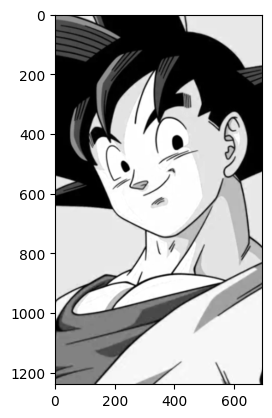

In [19]:
plt.imshow(img_goku_hsv[:, :, 2], cmap='gray')

- Podemos fazer um combinação de canais dois tipos de espaço de cor

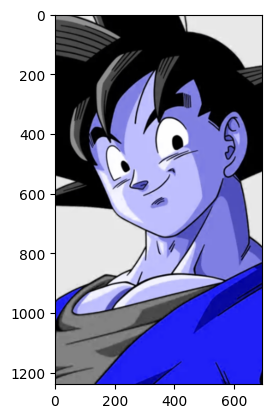

In [20]:
r, g, b = cv2.split(img_goku)
h, s, v = cv2.split(img_goku_hsv)
new_img = cv2.merge((b, b, v))
plt.imshow(new_img)

# Redimensionando uma imagem
- Uma operação muito comum é redimensionar imagens
    - Duas opções: aumentar ou diminuir resolução
- Para ambos os casos, existem diversos algoritmos para obter o resultado final
    - Basicamente, precisamos olhar para os pixels vizinhos para agregar (diminuir) ou preencher (aumenar) os novos pixels
    
![](assets/scaling.png)


- A biblioteca possui o método `resize()` para aplicar a operação

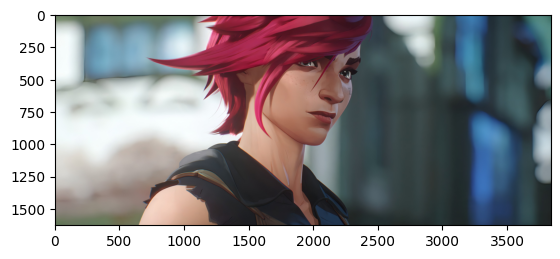

In [21]:
img_vi = cv2.cvtColor(cv2.imread("assets/vi.jpg"), cv2.COLOR_BGR2RGB)
plt.imshow(img_vi)

- Vamos usar a o método passando uma dimensão desejada e um método de interpolação

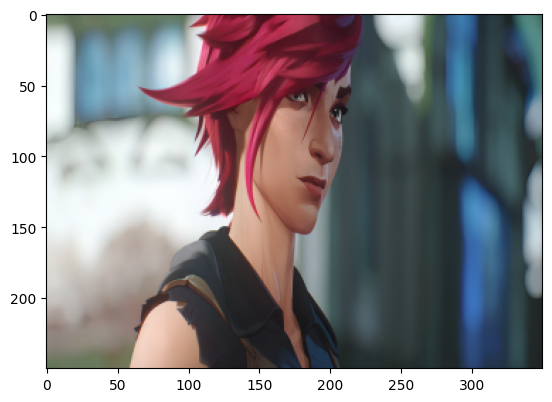

In [22]:
img_vi_res = cv2.resize(img_vi, (350, 250), interpolation=cv2.INTER_AREA)
plt.imshow(img_vi_res)

- Outra opção é passar o fator de resolução em cada eixo

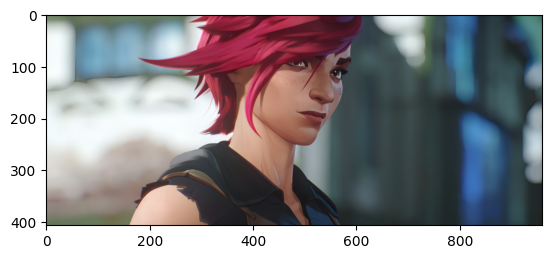

In [23]:
img_vi_res = cv2.resize(img_vi, None, fx=0.25, fy=0.25, interpolation=cv2.INTER_AREA)
plt.imshow(img_vi_res)

- Existem diversos tipos de interpolação, com vantagens e desvantagens
    - Ex: `INTER_LINEAR`, `INTER_CUBIC`
- Normalmente, para ampliar uma imagem, é desejavel usar `INTER_LINEAR` ou `INTER_CUBIC` e para diminuir `INTER_AREA`
    - A cubica oferece um resultado melhor, mas é mais demorada

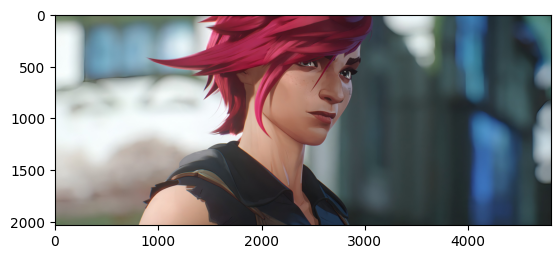

In [28]:
img_vi_res = cv2.resize(img_vi, None, fx=1.25, fy=1.25, interpolation=cv2.INTER_CUBIC)
plt.imshow(img_vi_res)

- Podemos fazer uma função para fazer redimensionamento a partir de uma valor de escala

In [29]:
def redimensiona_img(img, scale=0.5):
    height = int(img.shape[0] * scale)
    width = int(img.shape[1] * scale)
    return cv2.resize(img, (width, height), interpolation=cv2.INTER_AREA)

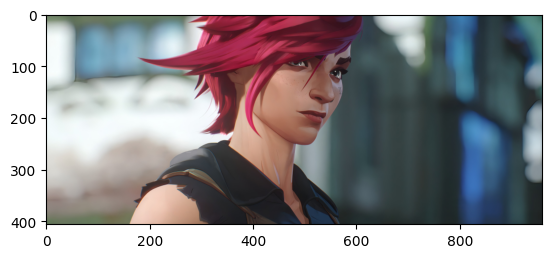

In [30]:
plt.imshow(redimensiona_img(img_vi, 0.25))

## Transformações em uma imagem (*image transformation*)
- OpenCV oferece o método `warpAffine()` para realização de [*warping*](https://en.wikipedia.org/wiki/Image_warping)
    - Translação, Rotação, etc
    - Não vamos entrar a fundo em Transformações Afins (*affine transformations*) e Euclideanas
    - [Material complementar](https://www.cis.rit.edu/class/simg782/lectures/lecture_02/lec782_05_02.pdf)
    
### Translação
- É basicamente o deslocamento da localização da imagem ao adicionar ou subtrair das coordenadas `x` e `y`
- Para isso, precisamos de uma matriz de transformação:

$$
\begin{bmatrix}
1 & 0 & t_x \\
0 & 1 & t_y
\end{bmatrix}
$$

- Precisamos determinas os valores de $t_x$ e $t_y$ que vão transladar a imagem de acordo com os valores informados
- As direções são as seguintes:
    - $t_x < 0$: vai para esquerda
    - $t_x > 0$: vai para direita
    - $t_y < 0$: vai para cima
    - $t_y > 0$: vai para baixo

In [31]:
def translate_img(img, tx, ty):
    height, width = img.shape[0], img.shape[1]
    T = np.array([
        [1, 0, tx],
        [0, 1, ty]
    ], dtype=np.float32)
    new_img = cv2.warpAffine(img, # imagem original
                             T, # matriz de transformação linear
                             (width, height) # dimensão da nova imagem
                            )
    return new_img

In [32]:
img_vi_res = cv2.resize(img_vi, None, fx=0.25, fy=0.25, interpolation=cv2.INTER_AREA)

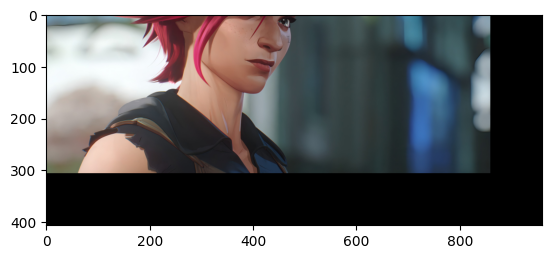

In [33]:
trans_vi = translate_img(img_vi_res, -100, -100)
plt.imshow(trans_vi)

### Rotação
- A intenção aqui é fazer uma rotação dado um angulo $\theta$
- Isso também é feito através de uma matriz de transformação linear. Neste caso, uma matriz de rotação:

$$MR = 
\begin{bmatrix}
   cos\theta & -sin\theta \\
   sin\theta & cos\theta
\end{bmatrix}
$$

- Porém, o OpenCV oferece uma opção de rotação com ajuste de centralização e *scale*, o que resulta na seguinte matriz:

$$MR = 
\begin{bmatrix}
   \alpha & \beta & (1-\alpha).c.x - \beta.c.y\\
   -\beta & \alpha & \beta.c.x + (1-\alpha).c.y   
\end{bmatrix}
$$

Na qual $c$ é o centro e $\alpha = scale.cos\theta$ e $\beta = scale.sin\theta$

- Para obter essa matriz, a biblioteca nos fornece o método `getRotationMatrix2D()`
    - Ele recebe o centro da rotação, o angulo e a escala
    - O algulo rotaciona em sentido anti-horario

In [34]:
def rotate_img(img, angle, scale=1.0, rot_pos=None):
    height, width = img.shape[0], img.shape[1]
    
    # Neste caso, centro de rotação vai ser o centro da imagem
    if rot_pos is None:
        rot_pos = (width//2, height//2)
    
    rot_matrix = cv2.getRotationMatrix2D(rot_pos, angle, scale)
    
    img_rot = cv2.warpAffine(img, # imagem original
                             rot_matrix, # matriz de transformação linear
                             (width, height) # dimensão da nova imagem
                            )
    return img_rot

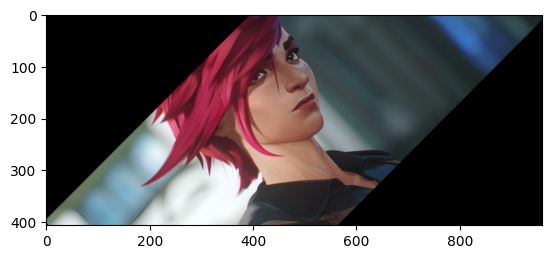

In [35]:
rot_vi = rotate_img(img_vi_res, 45)
plt.imshow(rot_vi)

- A biblioteca também oferece o método `flip()` para executar rotações
    - `0`: inverte a imagem na vertical
    - `1`: inverte na horizontal
    - `-1`: faz as duas operações acima

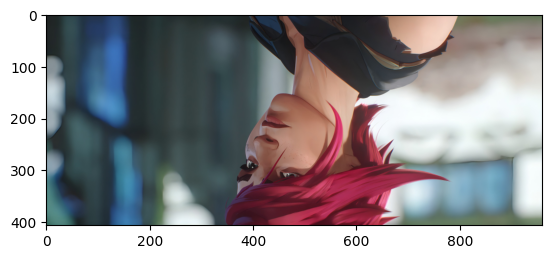

In [36]:
flip_vi = cv2.flip(img_vi_res, -1)
plt.imshow(flip_vi)

- **Tip:**: podemos fazer um crop na imagem usando apenas numpy

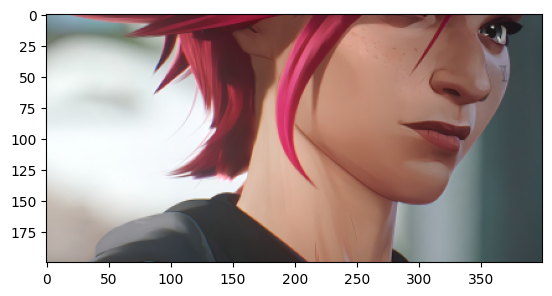

In [37]:
crop_vi = img_vi_res[100:300, 200:600, :]
plt.imshow(crop_vi)

___
## Exercício
- Pegue uma imagem, rotacione ela e retorne um centro dela cropado de acordo com as posições que usuário indicar
___

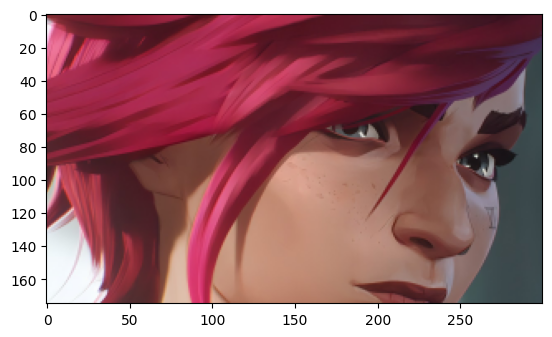

In [49]:
def rot_crop(img, ang, x1, x2, y1, y2):
    img_crop = img[x1:x2, y1:y2, :]
    rotate_img(img_crop, ang)
    return img_crop

vi_rc = rot_crop(img_vi_res, 45, 25, 200, 300, 600)
plt.imshow(vi_rc)